In [199]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importing data from csv file

data = pd.read_csv('files/FinalTransformedData_ReadyForClassification_v2.csv')

In [200]:
data.drop(['COVID_MONTH'], axis=1, inplace=True)

In [201]:
data.head()

,AIRPORT_NAME,STATE,COUNTRY,MONTH_x,AIRPORT_SPIKE,COVID_SPIKE
0,"Abilene, TX: Abilene Regional",TEXAS,USA,2019-12,0,0.0
1,"Akron, OH: Akron-Canton Regional",OHIO,USA,2019-12,0,0.0
2,"Albany, NY: Albany International",NEW YORK,USA,2019-12,0,0.0
3,"Albuquerque, NM: Albuquerque International Sun...",NEW MEXICO,USA,2019-12,0,0.0
4,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",PENNSYLVANIA,USA,2019-12,0,0.0


In [202]:
# Select the features to use for clustering
X = data[['AIRPORT_SPIKE', 'COVID_SPIKE']]

In [203]:
X.head()

,AIRPORT_SPIKE,COVID_SPIKE
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0


In [204]:
le = LabelEncoder()
X['AIRPORT_NAME'] = le.fit_transform(data['AIRPORT_NAME'])
X['STATE'] = le.fit_transform(data['STATE'])
X['COUNTRY'] = le.fit_transform(data['COUNTRY'])

/var/folders/p4/hlxhx3f935b76xxbjpc02qqw0000gn/T/ipykernel_8553/3363197704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['AIRPORT_NAME'] = le.fit_transform(data['AIRPORT_NAME'])
/var/folders/p4/hlxhx3f935b76xxbjpc02qqw0000gn/T/ipykernel_8553/3363197704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['STATE'] = le.fit_transform(data['STATE'])
/var/folders/p4/hlxhx3f935b76xxbjpc02qqw0000gn/T/ipykernel_8553/3363197704.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [205]:
# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

# using Kmeans

In [206]:
# Create a KMeans object with k=3
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)

# Fit the model to the data
kmeans.fit(X)

# Predict the cluster labels for each data point
labels = kmeans.predict(X)



# create SVM classifier
clf = svm.SVC(probability=True)

# train the classifier
clf.fit(iris.data)
# predict probabilities
probs = clf.predict_proba(iris.data)

# convert to hard assignment
hard_assignment = clf.predict(iris.data)

In [207]:
data['CLUSTER'] = kmeans.labels_

In [208]:
data.head()

,AIRPORT_NAME,STATE,COUNTRY,MONTH_x,AIRPORT_SPIKE,COVID_SPIKE,CLUSTER
0,"Abilene, TX: Abilene Regional",TEXAS,USA,2019-12,0,0.0,1
1,"Akron, OH: Akron-Canton Regional",OHIO,USA,2019-12,0,0.0,1
2,"Albany, NY: Albany International",NEW YORK,USA,2019-12,0,0.0,1
3,"Albuquerque, NM: Albuquerque International Sun...",NEW MEXICO,USA,2019-12,0,0.0,1
4,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",PENNSYLVANIA,USA,2019-12,0,0.0,1


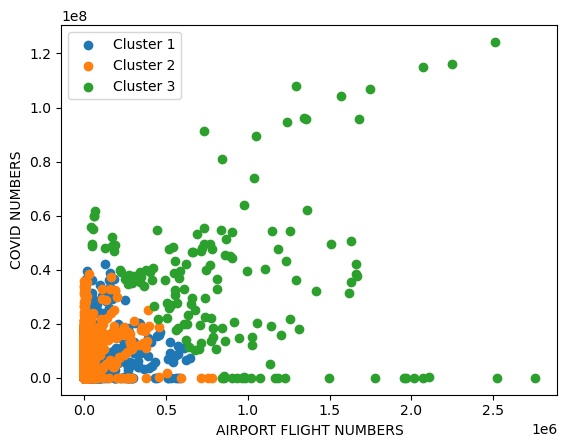

In [209]:
x_orig = scaler.inverse_transform(X)

label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(len(label_names)):
    plt.scatter(data.iloc[data['CLUSTER'].values == i, 4], data.iloc[data['CLUSTER'].values == i, 5], label=label_names[i])

# plt.scatter(data.iloc[:, 4], data.iloc[:, 5], c=data['CLUSTER'], label=[l for l in label_names])
plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()

In [210]:
cluster_centers = kmeans.cluster_centers_

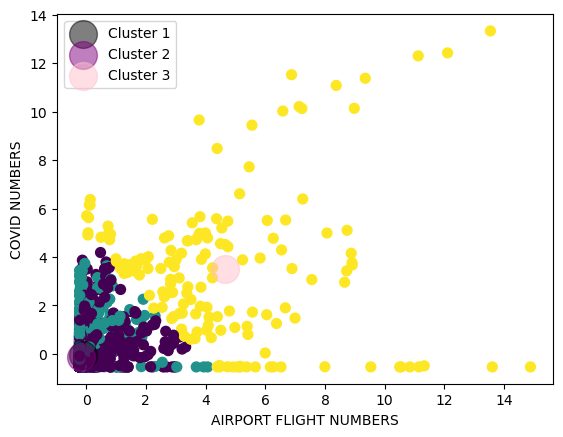

In [211]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')

colors = ['black', 'purple', 'pink']
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=colors[i], s=400, alpha=0.5, label=label_names[i])

plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()

In [212]:
cluster_centers

array([[-0.10730409, -0.06749548,  0.11725355, -0.93831835,  0.        ],
       [-0.16432529, -0.13710205, -0.10305643,  0.86975844,  0.        ],
       [ 4.64782348,  3.52123789, -0.07213067, -0.22088601,  0.        ]])

In [213]:
data.head()

,AIRPORT_NAME,STATE,COUNTRY,MONTH_x,AIRPORT_SPIKE,COVID_SPIKE,CLUSTER
0,"Abilene, TX: Abilene Regional",TEXAS,USA,2019-12,0,0.0,1
1,"Akron, OH: Akron-Canton Regional",OHIO,USA,2019-12,0,0.0,1
2,"Albany, NY: Albany International",NEW YORK,USA,2019-12,0,0.0,1
3,"Albuquerque, NM: Albuquerque International Sun...",NEW MEXICO,USA,2019-12,0,0.0,1
4,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",PENNSYLVANIA,USA,2019-12,0,0.0,1


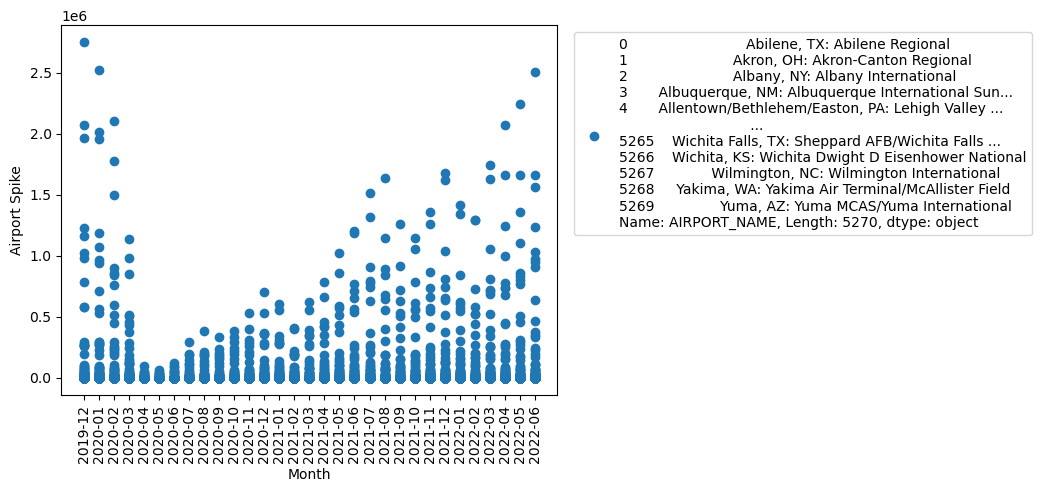

In [214]:
colors = ['red', 'green', 'blue', 'purple', 'orange']

plt.scatter(data['MONTH_x'], data['AIRPORT_SPIKE'],label=data['AIRPORT_NAME'])
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Airport Spike')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1))
plt.show()

In [215]:
data.columns

Index(['AIRPORT_NAME', 'STATE', 'COUNTRY', 'MONTH_x', 'AIRPORT_SPIKE',
       'COVID_SPIKE', 'CLUSTER'],
      dtype='object')

In [216]:
# Use the pivot method to reshape the data into a 2D table
data_pivot = data.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='AIRPORT_SPIKE')


In [217]:
data_pivot.columns

Index(['2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05',
       '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11',
       '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05',
       '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11',
       '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05',
       '2022-06'],
      dtype='object', name='MONTH_x')

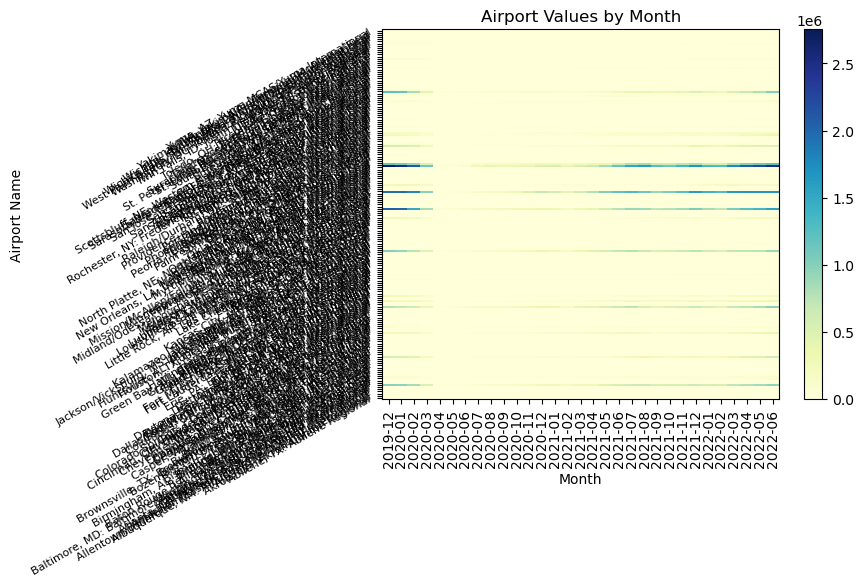

In [218]:
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot, cmap='YlGnBu')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(data['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(data['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(data['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(data['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()


# Creating Heatmap for just Georgia - Airport Data

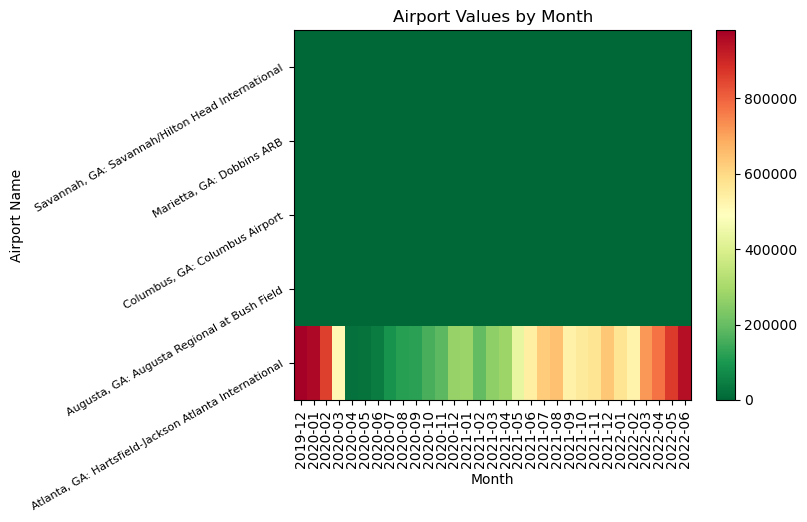

In [219]:
filtered_data_ga = data[data['STATE'] == 'GEORGIA']

# Use the pivot method to reshape the data into a 2D table
data_pivot_ga = filtered_data_ga.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='AIRPORT_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ga, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_ga['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_ga['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_ga['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_ga['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# Showing Georgia Covid Spike

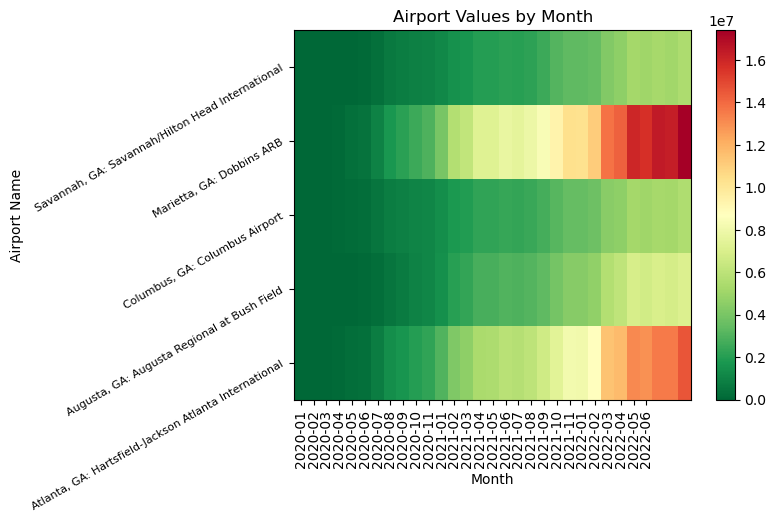

In [220]:
data_pivot_ga = filtered_data_ga.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='COVID_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ga, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

In [221]:
#Clustering For Georgia
filtered_data_ga.head()

,AIRPORT_NAME,STATE,COUNTRY,MONTH_x,AIRPORT_SPIKE,COVID_SPIKE,CLUSTER
6,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",GEORGIA,USA,2019-12,981142,0.0,2
8,"Augusta, GA: Augusta Regional at Bush Field",GEORGIA,USA,2019-12,0,0.0,0
39,"Columbus, GA: Columbus Airport",GEORGIA,USA,2019-12,0,0.0,0
92,"Marietta, GA: Dobbins ARB",GEORGIA,USA,2019-12,0,0.0,0
145,"Savannah, GA: Savannah/Hilton Head International",GEORGIA,USA,2019-12,0,0.0,0


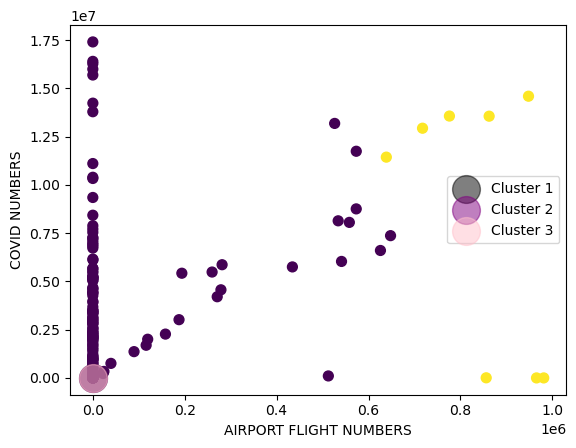

In [222]:
# georgia_data = data[data['STATE'] == 'GEORGIA']
filtered_data_ga_array = filtered_data_ga.values
plt.scatter(filtered_data_ga_array[:, 4].astype(int), filtered_data_ga_array[:, 5].astype(int), c=filtered_data_ga_array[:, 6], s=50, cmap='viridis')
colors = ['black', 'purple', 'pink']
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# for i in range(len(label_names)):
#     plt.scatter(filtered_data.iloc[filtered_data['CLUSTER'].values == i, 4], filtered_data.iloc[filtered_data['CLUSTER'].values == i, 5], label=label_names[i])


for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=colors[i], s=400, alpha=0.5, label=label_names[i])

plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()

# New York

Airport Flight Data

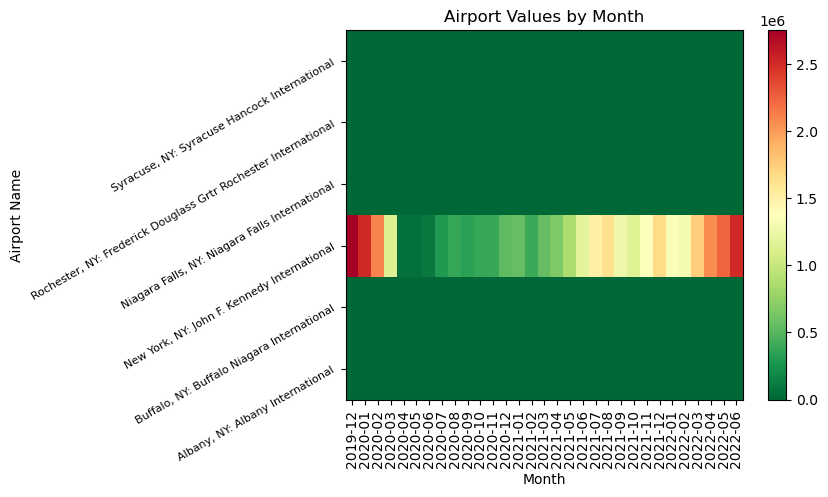

In [223]:
filtered_data_ny = data[data['STATE'] == 'NEW YORK']

# Use the pivot method to reshape the data into a 2D table
data_pivot_ny = filtered_data_ny.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='AIRPORT_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ny, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_ny['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_ny['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_ny['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_ny['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# New York

Covid numbers

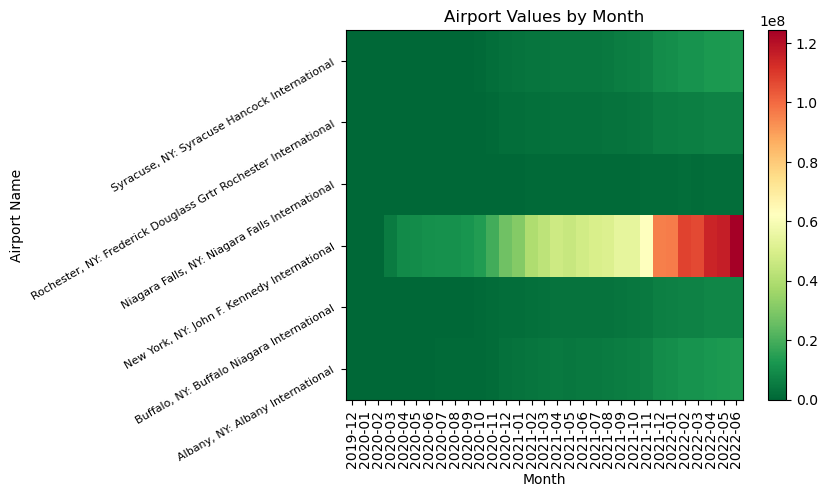

In [224]:
filtered_data_ny = data[data['STATE'] == 'NEW YORK']

# Use the pivot method to reshape the data into a 2D table
data_pivot_ny = filtered_data_ny.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='COVID_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ny, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_ny['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_ny['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_ny['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_ny['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# New York Data with Clusters

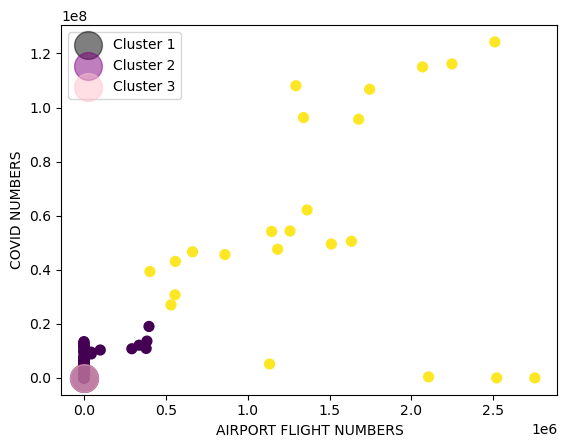

In [225]:
filtered_data_ny_array = filtered_data_ny.values
plt.scatter(filtered_data_ny_array[:, 4].astype(int), filtered_data_ny_array[:, 5].astype(int), c=filtered_data_ny_array[:, 6], s=50, cmap='viridis')
colors = ['black', 'purple', 'pink']
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# for i in range(len(label_names)):
#     plt.scatter(filtered_data.iloc[filtered_data['CLUSTER'].values == i, 4], filtered_data.iloc[filtered_data['CLUSTER'].values == i, 5], label=label_names[i])


for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=colors[i], s=400, alpha=0.5, label=label_names[i])

plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()

# California Airport Data

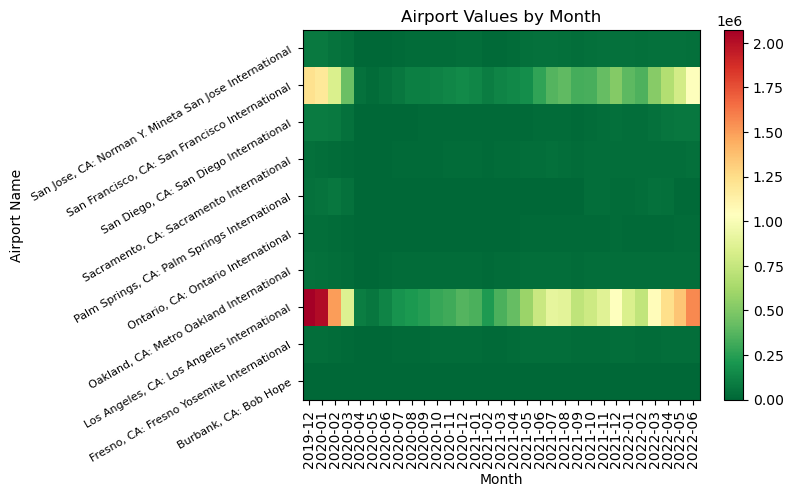

In [226]:
filtered_data_ca = data[data['STATE'] == 'CALIFORNIA']

# Use the pivot method to reshape the data into a 2D table
data_pivot_ca = filtered_data_ca.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='AIRPORT_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ca, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_ca['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_ca['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_ca['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_ca['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# California Covid Data

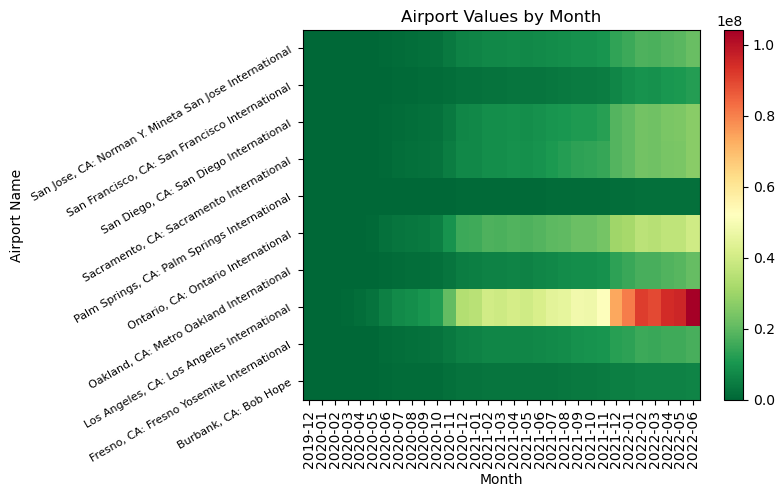

In [227]:
filtered_data_ca = data[data['STATE'] == 'CALIFORNIA']

# Use the pivot method to reshape the data into a 2D table
data_pivot_ca = filtered_data_ca.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='COVID_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_ca, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_ca['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_ca['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_ca['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_ca['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# California Clustered Data

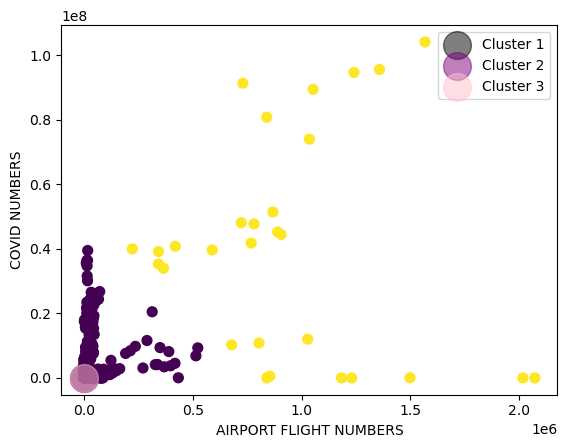

In [228]:
filtered_data_ca_array = filtered_data_ca.values
plt.scatter(filtered_data_ca_array[:, 4].astype(int), filtered_data_ca_array[:, 5].astype(int), c=filtered_data_ca_array[:, 6], s=50, cmap='viridis')
colors = ['black', 'purple', 'pink']
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# for i in range(len(label_names)):
#     plt.scatter(filtered_data.iloc[filtered_data['CLUSTER'].values == i, 4], filtered_data.iloc[filtered_data['CLUSTER'].values == i, 5], label=label_names[i])


for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=colors[i], s=400, alpha=0.5, label=label_names[i])

plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()

# Texas Airport Data

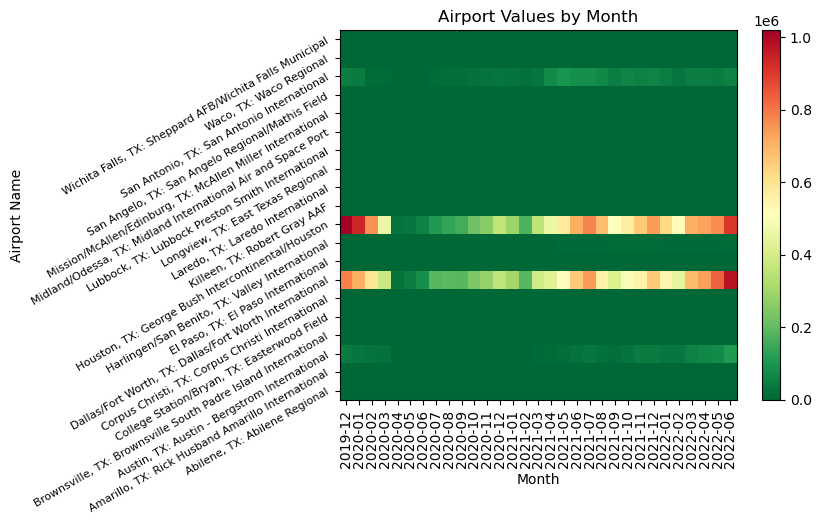

In [229]:
filtered_data_tx = data[data['STATE'] == 'TEXAS']

# Use the pivot method to reshape the data into a 2D table
data_pivot_tx = filtered_data_tx.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='AIRPORT_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_tx, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_tx['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_tx['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_tx['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_tx['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# Texas Covid Data

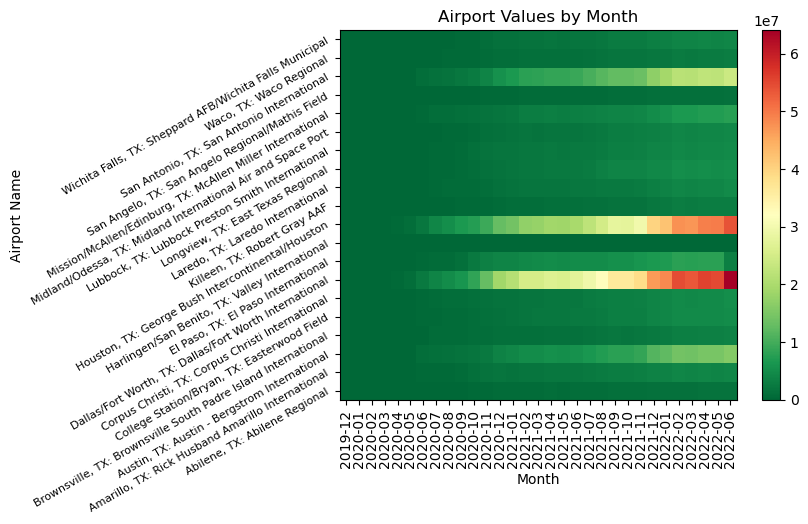

In [230]:
filtered_data_tx = data[data['STATE'] == 'TEXAS']

# Use the pivot method to reshape the data into a 2D table
data_pivot_tx = filtered_data_tx.pivot(index='AIRPORT_NAME', columns='MONTH_x', values='COVID_SPIKE')
# Create the heatmap using the pcolor method
fig, ax = plt.subplots()
heatmap = ax.pcolor(data_pivot_tx, cmap='RdYlGn_r')

# Add colorbar
cbar = plt.colorbar(heatmap)

# Set the x-axis tick labels to the month names
ax.set_xticks(np.arange(len(filtered_data_tx['MONTH_x'].unique())) + 0.5, minor=False)
ax.set_xticklabels(filtered_data_tx['MONTH_x'].unique(), minor=False, rotation=90)

# Set the y-axis tick labels to the airport names
ax.set_yticks(np.arange(len(filtered_data_tx['AIRPORT_NAME'].unique())) + 0.5, minor=False)
ax.set_yticklabels(filtered_data_tx['AIRPORT_NAME'].unique(), minor=False, fontsize=8, rotation=30)

# Add axis labels and title
plt.xlabel('Month')
plt.ylabel('Airport Name')
plt.title('Airport Values by Month')

plt.show()

# Texas Data Clustered

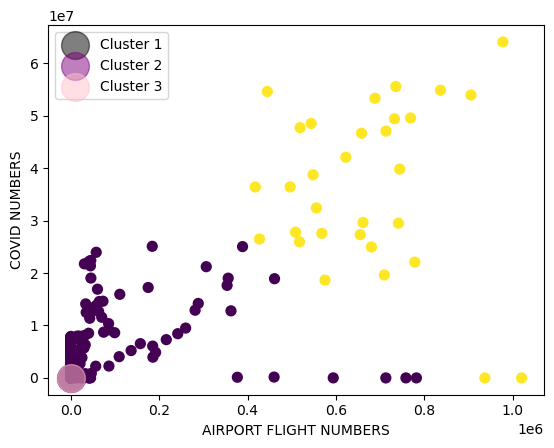

In [231]:
filtered_data_tx_array = filtered_data_tx.values
plt.scatter(filtered_data_tx_array[:, 4].astype(int), filtered_data_tx_array[:, 5].astype(int), c=filtered_data_tx_array[:, 6], s=50, cmap='viridis')
colors = ['black', 'purple', 'pink']
label_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

# for i in range(len(label_names)):
#     plt.scatter(filtered_data.iloc[filtered_data['CLUSTER'].values == i, 4], filtered_data.iloc[filtered_data['CLUSTER'].values == i, 5], label=label_names[i])


for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=colors[i], s=400, alpha=0.5, label=label_names[i])

plt.xlabel('AIRPORT FLIGHT NUMBERS')
plt.ylabel('COVID NUMBERS')
plt.legend()
plt.show()